In [2]:
import cv2
import os, shutil
import pandas as pd

from tqdm import tqdm
from matplotlib import pyplot as plt
from utils import *

# Reading directories data:

In [2]:
logos_data = pd.read_csv('logos_data_base.csv', sep=';', encoding='utf-8', index_col=[0])
logos_data

,filename,type
0,logos_data/Education/Universidad Americana Ciu...,Education
1,logos_data/Business/Stringer S_Business_281_32...,Business
2,logos_data/Arts/Liderfot Laboratorio Fotografi...,Arts
3,logos_data/Education/Universidad Latina_Educat...,Education
4,logos_data/Arts/Conexões Urbanas A revista do ...,Arts
...,...,...
185509,logos_data/Auto/CarWax Car Care Systems_Auto_2...,Auto
185510,logos_data/Medical/Vital Dent_Medical_81_10.jpg,Medical
185511,logos_data/Sports/Battlax_Sports_246_2.jpg,Sports
185512,logos_data/Business/FC Pacos De Ferreira_Busin...,Business


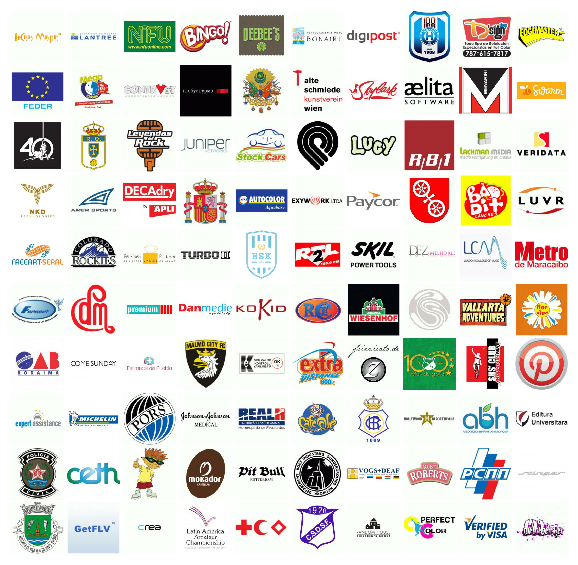

In [3]:
# show some random albums:
n_show = 100
random_logos = np.random.choice(len(logos_data.filename), n_show, replace=False)
logos_dirs = np.array(logos_data.filename)[random_logos]
image_batch = read_image_batch(logos_dirs, IMG_HW, preprocess=False)
show_tf_batch(image_batch, n_img=n_show)

# Detecting text with EAST text detector:

In [4]:
model = './east_text_detector/frozen_east_text_detection.pb'
outputLayers = ["feature_fusion/Conv_7/Sigmoid", "feature_fusion/concat_3"]
net = cv2.dnn.readNet(model)
text_am = []

for image_file in tqdm(logos_data.filename):
    
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
    (newW, newH) = (320, 320)

    image = cv2.resize(image, (newW, newH))
    (H, W) = image.shape[:2]

    blob = cv2.dnn.blobFromImage(image, 1.0, (W, H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
    
    net.setInput(blob)
    scores, _ = net.forward(outputLayers)
    
    text_am.append((scores > 0.5).sum())

100%|██████████| 185514/185514 [4:39:29<00:00, 11.06it/s]  


In [5]:
logos_data['text_amount'] = text_am

In [9]:
logos_data.to_csv('logos_data_base_text_am.csv', sep=';', encoding='utf-8')

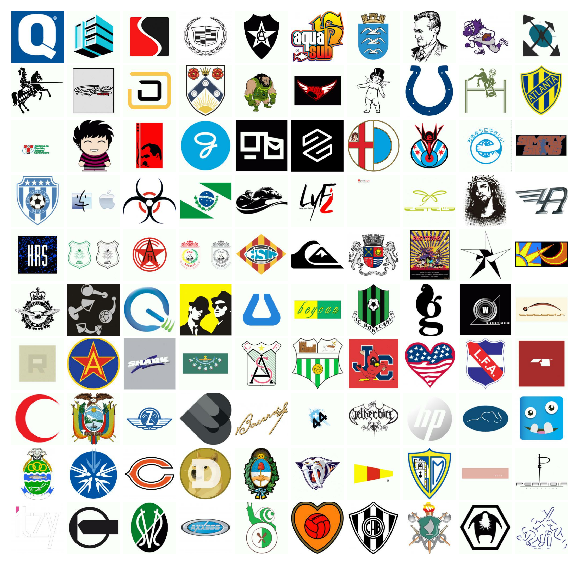

In [17]:
# Visualise images with no detected text:
no_text_logos = logos_data.query('text_amount == 0')
n_show = 100
random_logos = np.random.choice(len(no_text_logos.filename), n_show, replace=False)
logos_dirs = np.array(no_text_logos.filename)[random_logos]
image_batch = read_image_batch(logos_dirs, IMG_HW, preprocess=False)
show_tf_batch(image_batch, n_img=n_show)